Millions of people post reviews on amazon after their purchases. Want to know what is the most popular words for some of the item categories people write? Below are some of the open review data posted by amazon before 2015.

The 4 item categories are US Musical Instrument, US Apparels, US Groceries and UK general

When I uploaded the review files from the AWS open data source, there are about 100000 samples for each category. This is just to give a brief overview of the first 500 samples from each category.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

US Musical Instruments: Only about 500 samples 

In [2]:
df1 = pd.read_csv('amazon_reviews_us_Musical_Instruments_v1_00.csv')
df1.head()


C:\Users\alloq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,3,5,6,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,45610553.0,RMDCHWD0Y5OZ9,B00HH62VB6,618218723.0,AGPtekÂ® 10 Isolated Output 9V 12V 18V Guitar ...,Musical Instruments,3.0,0.0,1.0,N,N,Three Stars,"Works very good, but induces ALOT of noise.",8/31/15
1,US,14640079.0,RZSL0BALIYUNU,B003LRN53I,986692292.0,Sennheiser HD203 Closed-Back DJ Headphones,Musical Instruments,5.0,0.0,0.0,N,Y,Five Stars,Nice headphones at a reasonable price.,8/31/15
2,US,6111003.0,RIZR67JKUDBI0,B0006VMBHI,603261968.0,AudioQuest LP record clean brush,Musical Instruments,3.0,0.0,1.0,N,Y,Three Stars,removes dust. does not clean,8/31/15
3,US,1546619.0,R27HL570VNL85F,B002B55TRG,575084461.0,Hohner Inc. 560BX-BF Special Twenty Harmonica,Musical Instruments,5.0,0.0,0.0,N,Y,I purchase these for a friend in return for pl...,I purchase these for a friend in return for pl...,8/31/15
4,US,12222213.0,R34EBU9QDWJ1GD,B00N1YPXW2,165236328.0,Blue Yeti USB Microphone - Blackout Edition,Musical Instruments,5.0,0.0,0.0,N,Y,Five Stars,This is an awesome mic!,8/31/15


In [3]:
df1.dropna(subset=['review_body'], how='all', inplace = True)
list1 =[]
for headline in df1['review_headline']:
    list1.append(headline)
for review in df1['review_body']:
    list1.append(review)


In [4]:

str1 = ' '.join(list1)
str1

'Three Stars Five Stars Three Stars I purchase these for a friend in return for playing ... Five Stars Five Stars Will not Fit Epiphone SG Special or any other Epi SG. Five Stars Works fine. Hope it lasts through the warranty period this ... I upgraded the power cord to a heavier gauge which only cost me an extra 5 bucks and a little of my time *** I\'d totally recomme My son\'s favourite trumpet valve oil Great pop filter - poor mount Ok Two Stars Five Stars Great stand... only one little glitch Looks great. You have to anticipate tapping new screwholes when ... Poor sound quality Perfect for the beginner It really is a musical instrument and the book is a fantastic way to begin Five Stars Perfect for what I needed Four Stars good fit. perfect for throwing it on the back Why Read? Buy it! Woodi recorder Five Stars This fills a room with a colored light show, the auto sound activation keeps my Grandchildren singing & giggling. Priceless! Satisfied Customer Unable to Use Five Stars Five

In [5]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

tokens = word_tokenize(str1)
lower_tokens = [t.lower() for t in tokens]
sw = stopwords.words('english')

alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in sw]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(100))
print(len(no_stops), len(lemmatized))


[('great', 231), ('star', 201), ('five', 153), ('sound', 153), ('br', 153), ('good', 150), ('work', 98), ('quality', 87), ('guitar', 86), ('one', 83), ('price', 81), ('product', 75), ('use', 69), ('well', 69), ('love', 66), ('like', 66), ('would', 60), ('nice', 56), ('get', 55), ('time', 51), ('really', 50), ('light', 49), ('instrument', 47), ('little', 46), ('play', 46), ('much', 46), ('better', 45), ('easy', 43), ('string', 42), ('made', 40), ('bought', 39), ('best', 38), ('perfect', 37), ('high', 34), ('make', 33), ('year', 32), ('mic', 32), ('amp', 32), ('look', 31), ('excellent', 31), ('needed', 30), ('way', 29), ('buy', 29), ('also', 29), ('lot', 28), ('small', 28), ('need', 28), ('thing', 28), ('headphone', 28), ('used', 27), ('fit', 26), ('two', 26), ('worked', 26), ('plastic', 26), ('go', 25), ('could', 25), ('back', 24), ('money', 24), ('awesome', 24), ('even', 24), ('stand', 23), ('pick', 23), ('without', 23), ('tone', 23), ('still', 22), ('pedal', 22), ('bass', 22), ('recom

These are the word counts from the reviews and headlines. 'great', 'star', 'five' are the most popular words. Followed by 'sound' and 'good'. Please ignore the 'br'. Wordcloud is a great display of the common words appeared in the reviews and headlines!

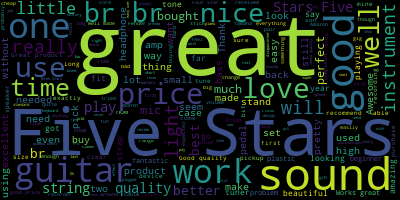

In [7]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

wordcloud.generate(str1)
wordcloud.to_image()

Next, we have the US Apparels.

In [8]:
df2 = pd.read_csv('amazon_reviews_us_Apparel_v1_00.csv')
df2.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4,0,0,N,Y,â˜… THESE REALLY DO WORK GREAT WITH SOME TWEAK...,"These Really Do Work Great, But You Do Need To...",1/14/13
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5,1,2,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,3/04/14
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5,0,0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",7/12/15
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5,0,0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",6/03/15
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5,0,0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,6/12/15


In [9]:
df2.dropna(subset=['review_body'], how='all', inplace = True)
list2 =[]
for headline in df2['review_headline']:
    list2.append(headline)
for review in df2['review_body']:
    list2.append(review)

str2 = ' '.join(list2)
str2

'â˜… THESE REALLY DO WORK GREAT WITH SOME TWEAKING â˜… Favorite for winter. Very warm! Great Socks for the money. Slick hat! I would do it again! Five Stars Love it! Three Stars Five Stars Not my favorite. The Jockey Women\'s Underwear are true to size. They ... Five Stars Five Stars best ever4 for men&woman too size for men 42-44-8 Five Stars Five Stars Four Stars Awesome leggings! Sizes not correct, too big overall and WAY too long One Star Warm Pajamas Three Stars pretty color-these Glamorise bras are amazing-they hold you all day ... Summer jeans Five Stars but is a nice sweatshirt. quick arrival Five Stars Arrived quickly and looks just as image. Very comfortable! Expensive Cinch Sak Great Gift Five Stars Five Stars Excellent RFID Wallet Roomy and soft to the touch Loves it!!!! Five Stars Really Nice Socks,Good Quality Cute dress, Please be advised that this cute dress ... Nice solid fit! Great for running and my yoga and Pilates classes. The pants were great! Just one thing Dress

In [10]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

tokens = word_tokenize(str2)
lower_tokens = [t.lower() for t in tokens]
sw = stopwords.words('english')

alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in sw]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(100))
print(len(no_stops), len(lemmatized))


[('br', 429), ('dress', 276), ('love', 270), ('fit', 264), ('great', 239), ('shirt', 210), ('like', 195), ('size', 193), ('wear', 157), ('review', 145), ('nice', 144), ('star', 140), ('quality', 134), ('would', 129), ('well', 128), ('look', 126), ('one', 122), ('received', 119), ('product', 118), ('good', 117), ('color', 113), ('really', 108), ('cute', 103), ('comfortable', 102), ('five', 97), ('little', 97), ('honest', 97), ('perfect', 92), ('get', 90), ('material', 89), ('made', 87), ('exchange', 86), ('soft', 83), ('ordered', 82), ('small', 80), ('ring', 77), ('got', 75), ('discount', 74), ('also', 71), ('feel', 70), ('fabric', 70), ('beautiful', 68), ('price', 65), ('large', 62), ('super', 60), ('make', 58), ('time', 58), ('item', 57), ('picture', 56), ('unbiased', 54), ('way', 52), ('even', 52), ('top', 51), ('much', 51), ('wearing', 50), ('buy', 50), ('expected', 48), ('coffee', 48), ('bit', 47), ('bought', 44), ('design', 44), ('pretty', 42), ('recommend', 42), ('happy', 40), ('

Not a surprise, the most common words are 'dress', 'love', 'fit', 'great' and 'shirt'. 

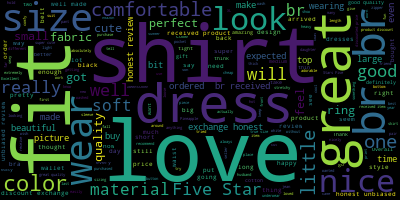

In [11]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

wordcloud.generate(str2)
wordcloud.to_image()

This is a review of US who purchased food items.

In [12]:
df3 = pd.read_csv('amazon_reviews_us_Grocery_v1_00.csv')
df3.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0,0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",8/31/15
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0,0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",8/31/15
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0,0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,8/31/15
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0,0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,8/31/15
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0,0,N,Y,Five Stars,good,8/31/15


In [13]:
df3.dropna(subset=['review_body'], how='all', inplace = True)
list3 =[]
for headline in df3['review_headline']:
    list3.append(headline)
for review in df3['review_body']:
    list3.append(review)

str3 = ' '.join(list3)
str3

'Using these for years - love them. Wonderful Five Stars Five Stars Five Stars Not Happy Five Stars Five Stars Great tasting! Disgusting now and difficult on digestion If you like soy sauce, you\'ll really like this - Four Stars Five Stars Five Stars Five Stars Excellent YUMMY! 1 Out Of 5 Of My Co-Workers Thought It Was "Okay" delicious tea and easy to make Best coconut oil Five Stars Five Stars This is a good variety pita crackers Five Stars Nice big bottle Three Stars Five Stars Five Stars Five Stars i love it Five Stars fresh & great for any tomato base meal Five Stars Get some goodie from \'Downunder\' So So So far, I really like it! Five Stars There are no instructions to say to make sure it ... LifeSavers...Eons trusted name for quality, good tasting mints. Does not recommend! Three Stars Four Stars Five Stars Wonderful Watermelon! Great product Good flavor Tasteless This tea is great. I enjoyed each flavor My favorite tea! good Tastes great and the organic brand is not much bett

In [14]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

tokens = word_tokenize(str3)
lower_tokens = [t.lower() for t in tokens]
sw = stopwords.words('english')

alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in sw]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(100))
print(len(no_stops), len(lemmatized))

[('star', 229), ('great', 192), ('five', 176), ('good', 169), ('taste', 147), ('br', 145), ('love', 143), ('like', 138), ('product', 110), ('flavor', 108), ('one', 78), ('tea', 70), ('really', 68), ('coffee', 65), ('use', 55), ('make', 52), ('delicious', 51), ('best', 51), ('time', 50), ('get', 48), ('bar', 43), ('price', 43), ('would', 40), ('much', 38), ('also', 35), ('favorite', 34), ('buy', 34), ('little', 34), ('organic', 33), ('sugar', 33), ('fresh', 32), ('brand', 32), ('candy', 32), ('drink', 31), ('peanut', 31), ('perfect', 31), ('yummy', 30), ('oil', 30), ('better', 30), ('sweet', 30), ('try', 30), ('butter', 29), ('used', 29), ('need', 29), ('water', 26), ('way', 25), ('well', 25), ('first', 24), ('still', 24), ('add', 24), ('stuff', 23), ('enjoy', 23), ('go', 23), ('day', 23), ('protein', 23), ('year', 22), ('excellent', 22), ('easy', 22), ('coconut', 22), ('quality', 22), ('bag', 22), ('enough', 22), ('nice', 21), ('regular', 21), ('tried', 21), ('order', 21), ('ca', 21), 

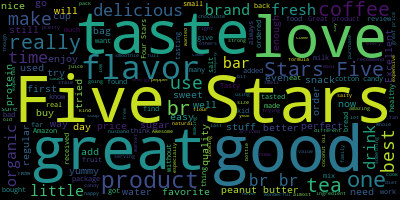

In [15]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

wordcloud.generate(str3)
wordcloud.to_image()

Customers from UK


In [16]:
df4 = pd.read_csv('amazon_reviews_multilingual_UK_v1_00.csv')
df4.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,UK,10349,R2YVNBBMXD8KVJ,B00MWK7BWG,307651059,My Favourite Faded Fantasy,Music,5,0,0,N,Y,Five Stars,The best album ever!,12/29/14
1,UK,10629,R2K4BOL8MN1TTY,B006CHML4I,835010224,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4,0,0,N,Y,Great watch from casio.,What a great watch. Both watches and strap is ...,10/24/13
2,UK,12136,R3P40IEALROVCH,B00IIFCJX0,271687675,Dexter Season 8,Digital_Video_Download,5,0,0,N,Y,fantastic,"love watching all the episodes of Dexter, when...",5/09/14
3,UK,12268,R25XL1WWYRDLA9,B000W7JWUA,211383699,The Settlers of Catan Board Game - discontinue...,Toys,5,0,0,N,Y,Five Stars,Excellent game!!!,9/19/14
4,UK,12677,RVTVB9YDXSFYH,B005JTAP4S,182965893,Peter: A Darkened Fairytale (Vol 1),Digital_Ebook_Purchase,5,12,12,N,N,A twist on Tales,"This cute, quick read is very different to say...",9/18/13


In [17]:
df4.dropna(subset=['review_body'], how='all', inplace = True)
list4 =[]
for headline in df4['review_headline']:
    list4.append(headline)
for review in df4['review_body']:
    list4.append(review)

str4 = ' '.join(list4)
str4

'Five Stars Great watch from casio. fantastic Five Stars A twist on Tales scratches n a crack A Gripping Page Turner! Birthday present for an Arnie fan Nice steelbook case very good soundtrack and most important a very good movie. MAGIC!!! gd not sure Four Stars Five Stars Four Stars Lol Bogus YouTube Return to Splendour Great present XX4 JVC, Ears some of the best voices in the world good read all good apart from postage Top tune music amazing excellent Five Stars Love it epic Three Stars Three Stars Good Films, Bad Box Sometimes cheesey, sometimes dark but always entertaining. By ... Great Collection! Five Stars Great! Fantastic read. Stayed up til 6am cause I had ... I bought for my daughter. she is 2 years ... addictive game Mendelssohn 5 symphonies & 7 overtures. ... go along with the other positive reviews of this wonderful collection. I am one of those unsophisticates who ... A+ FALSE really pleased Exhaustive research into our history,  (mankind). Psychologically thrilling. Fin

In [18]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

tokens = word_tokenize(str4)
lower_tokens = [t.lower() for t in tokens]
sw = stopwords.words('english')

alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in sw]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(100))
print(len(no_stops), len(lemmatized))

[('br', 201), ('great', 194), ('star', 178), ('book', 176), ('good', 164), ('five', 127), ('film', 125), ('love', 119), ('read', 107), ('would', 98), ('one', 93), ('game', 86), ('time', 75), ('really', 70), ('story', 64), ('brilliant', 57), ('best', 56), ('recommend', 54), ('album', 52), ('well', 52), ('get', 52), ('could', 51), ('like', 51), ('series', 49), ('excellent', 48), ('cd', 48), ('bought', 43), ('movie', 42), ('much', 41), ('amazing', 40), ('year', 37), ('loved', 37), ('fun', 36), ('character', 34), ('first', 33), ('dvd', 33), ('song', 33), ('fantastic', 32), ('fan', 32), ('put', 32), ('enjoyed', 32), ('say', 32), ('watch', 31), ('reading', 30), ('day', 29), ('better', 28), ('every', 28), ('buy', 27), ('make', 27), ('four', 26), ('worth', 26), ('know', 26), ('go', 25), ('perfect', 25), ('lot', 25), ('ever', 24), ('anyone', 24), ('also', 24), ('music', 23), ('new', 23), ('back', 22), ('play', 22), ('quality', 22), ('never', 22), ('must', 22), ('easy', 22), ('got', 21), ('think

The adjective and verb are similar to the US reviews which are 'great', 'good' and 'love'. 


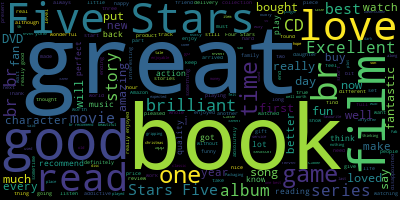

In [19]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

wordcloud.generate(str4)
wordcloud.to_image()